# C57: Conjunto de entrenamiento y conjunto de testing

*En una de las respuestas de esta clase se encuentra un dataset y proyecto terminado de uno de los  estudiantes*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #Para realizar validación cruzada con sklearn

In [3]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt");

In [4]:
len_data = len(data)

In [5]:
len_data

3333

## Dividir utilizando la distribución normal

In [6]:
#Crear un vector de la misma longitud que el dataset pero distribuido de forma normal

a = np.random.randn(len_data)

(array([  2.,  27., 176., 400., 792., 917., 631., 289.,  83.,  16.]),
 array([-3.65494997, -2.96092465, -2.26689932, -1.572874  , -0.87884868,
        -0.18482335,  0.50920197,  1.20322729,  1.89725262,  2.59127794,
         3.28530327]),
 <a list of 10 Patch objects>)

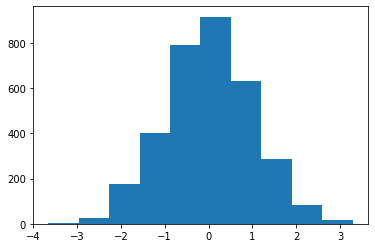

In [7]:
plt.hist(a)

Es importante volver a mencionar que la función de random es uniforme, lo que quiere decir es que todos los grupos de números como, por ejemplo, aquellos generados que se encuentren entre 0 y 0.1, tendrán la misma probabilidad de ocurrencia y la misma frecuencia de aparición que aquellos que vayan entre 0.9 y 1, por ejemplo, si es que dividimos el dataset en 10. Es por ello que al hacer *a < 0.8* estaremos obteniendo el 80% de la muestra total.

In [8]:
#buscamos hacer una división.
#Comprobar que de este vector a la condicion sea menor a un numero dado

check = (a < 0.8) #Resulta un array booleano. 0.8 corresponde al 80%. Cambiar el valor para obtener otra razón de 80/20 o 75/25

In [9]:
check

array([False,  True, False, ...,  True,  True,  True])

(array([ 715.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2618.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

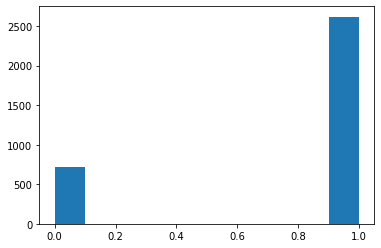

In [10]:
plt.hist(check*1) #Convertir el array de booleanos a enteros

In [11]:
training = data[check] #Aquellos que cumplen con la condición
testing = data[~check] #Aquellos que no cumplen con la condición

In [12]:
print("Longitud Entrenamiento: ", len(training)); # 78,79%
print("Longitud Testing: ", len(testing)); # 21,21%

Longitud Entrenamiento:  2618
Longitud Testing:  715


## Dividir dataset con la librería sklearn

In [13]:
train, test = train_test_split(data, test_size = 0.2) # El 20% será utilizado para propósitos de testing.

In [14]:
print("Longitud Entrenamiento: ", len(train)); # 79,99%
print("Longitud Testing: ", len(test)); # 20,01%

Longitud Entrenamiento:  2666
Longitud Testing:  667


## Dividir usando una función de shuffle

In [15]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [16]:
import sklearn

In [17]:
#Guardarlo en un orden aleatorio

data = sklearn.utils.shuffle(data)
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1780,AL,68,510,344-4970,no,no,0,157.3,83,26.74,...,85,18.78,218.9,129,9.85,12.0,7,3.24,1,False.
3195,ID,77,510,399-7029,no,yes,29,211.1,89,35.89,...,97,19.00,148.4,106,6.68,9.7,9,2.62,2,False.
2966,WV,177,408,376-9716,no,no,0,227.8,81,38.73,...,97,13.75,217.0,106,9.76,8.0,5,2.16,1,False.
3026,NE,78,510,422-8333,no,yes,32,210.3,116,35.75,...,83,16.34,246.1,92,11.07,10.8,4,2.92,6,False.
399,DC,66,415,402-5155,no,no,0,167.3,91,28.44,...,68,19.55,191.7,118,8.63,10.6,5,2.86,1,True.


In [18]:
cut_id = int(0.8*len(data))
train_data = data[:cut_id]
test_data = data[cut_id:]

In [19]:
print("Longitud Entrenamiento: ", len(train_data)); # 79,99%
print("Longitud Testing: ", len(test_data)); # 20,01%

Longitud Entrenamiento:  2666
Longitud Testing:  667


### Si queremos utilizar la misma semilla cada vez que ejecutemos el shuffle 

In [20]:
from sklearn.utils import shuffle
     
dtShuffled = shuffle(data, random_state = 3333)